# Spotify Music Data Analysis
This notebook explores a **Spotify dataset** obtained from Kaggle.  
The goal is to analyze the factors that influence song popularity, identify the most popular songs and artists, and explore musical features such as danceability, valence, and energy.

---

Importing libraries.

In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib 
import matplotlib.pyplot as plt
plt.style.use ('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


# 1. Analysing and cleaning data

In [2]:
# read data

df = pd.read_csv(r'C:\Users\user\Downloads\archive (1)\dataset.csv')
df.info()
print('Dataset shape:',df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [3]:
# inspecting for missing values

df.isna().sum()
df[df.isna().any(axis=1)]

# dropping missing values
df = df.dropna()

# checking for duplicates
df.duplicated().any()

print('\nDataset shape after cleaning:',df.shape)



Dataset shape after cleaning: (113999, 21)


In [56]:
df.to_csv(r'C:\Users\user\Downloads\cleaned_spotify_data.csv' )


Only one row had missing values so I decided to drop it since it will not affect the dataset much. Also there were no duplicates available in the dataset.

# 2. EDA analysis.

In [4]:
# descriptive statistics
df.describe()
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


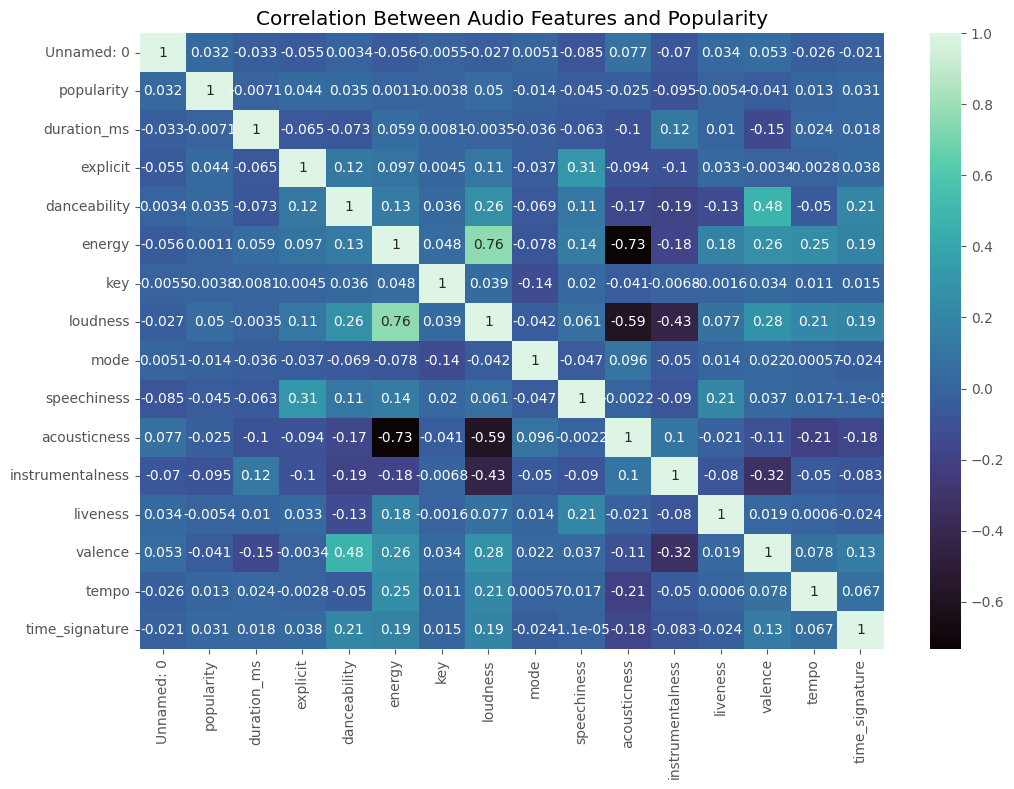

In [5]:
# correlation btwn audio features and popularity
plt.Figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), cmap='mako', annot=True)
plt.title("Correlation Between Audio Features and Popularity")
plt.show()


In [7]:
df.corr(numeric_only= True)

,Unnamed: 0,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
Unnamed: 0,1.000000,0.032146,-0.032738,-0.054735,0.003445,-0.055993,-0.005521,-0.027307,0.005110,-0.084952,0.076837,-0.070285,0.033641,0.053109,-0.025825,-0.021115
popularity,0.032146,1.000000,-0.007129,0.044078,0.035444,0.001053,-0.003847,0.050420,-0.013948,-0.044930,-0.025458,-0.095147,-0.005397,-0.040522,0.013212,0.031076
duration_ms,-0.032738,-0.007129,1.000000,-0.065270,-0.073435,0.058520,0.008123,-0.003475,-0.035581,-0.062605,-0.103770,0.124364,0.010308,-0.154464,0.024356,0.018229
explicit,-0.054735,0.044078,-0.065270,1.000000,0.122506,0.096954,0.004485,0.108587,-0.037216,0.307951,-0.094400,-0.103405,0.032547,-0.003378,-0.002815,0.038387
danceability,0.003445,0.035444,-0.073435,0.122506,1.000000,0.134325,0.036470,0.259076,-0.069224,0.108625,-0.171531,-0.185608,-0.131620,0.477347,-0.050448,0.207219
energy,-0.055993,0.001053,0.058520,0.096954,0.134325,1.000000,0.048007,0.761690,-0.078365,0.142508,-0.733908,-0.181880,0.184795,0.258937,0.247852,0.187127
key,-0.005521,-0.003847,0.008123,0.004485,0.036470,0.048007,1.000000,0.038591,-0.135911,0.020419,-0.040942,-0.006821,-0.001597,0.034099,0.010914,0.015064
loudness,-0.027307,0.050420,-0.003475,0.108587,0.259076,0.761690,0.038591,1.000000,-0.041768,0.060826,-0.589804,-0.433478,0.076897,0.279851,0.212447,0.191992
mode,0.005110,-0.013948,-0.035581,-0.037216,-0.069224,-0.078365,-0.135911,-0.041768,1.000000,-0.046535,0.095568,-0.049961,0.014004,0.021964,0.000572,-0.024090
speechiness,-0.084952,-0.044930,-0.062605,0.307951,0.108625,0.142508,0.020419,0.060826,-0.046535,1.000000,-0.002184,-0.089617,0.205218,0.036637,0.017274,-0.000011


In [14]:
#most popular song
most_popular_song = df.loc[df['popularity'].idxmax(), ['track_name', 'artists', 'album_name', 'popularity']]
print("Most Popular Song:")
print(most_popular_song)

Most Popular Song:
track_name    Unholy (feat. Kim Petras)
artists            Sam Smith;Kim Petras
album_name    Unholy (feat. Kim Petras)
popularity                          100
Name: 20001, dtype: object


In [15]:
# Top 10 Most Popular Songs
top_songs = df[['track_name', 'artists', 'album_name', 'popularity']].sort_values(by='popularity', ascending=False).head(10)
top_songs


,track_name,artists,album_name,popularity
20001,Unholy (feat. Kim Petras),Sam Smith;Kim Petras,Unholy (feat. Kim Petras),100
81051,Unholy (feat. Kim Petras),Sam Smith;Kim Petras,Unholy (feat. Kim Petras),100
51664,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52",99
88410,La Bachata,Manuel Turizo,La Bachata,98
30003,I'm Good (Blue),David Guetta;Bebe Rexha,I'm Good (Blue),98
68303,La Bachata,Manuel Turizo,La Bachata,98
89411,La Bachata,Manuel Turizo,La Bachata,98
81210,I'm Good (Blue),David Guetta;Bebe Rexha,I'm Good (Blue),98
67356,La Bachata,Manuel Turizo,La Bachata,98
20008,I'm Good (Blue),David Guetta;Bebe Rexha,I'm Good (Blue),98


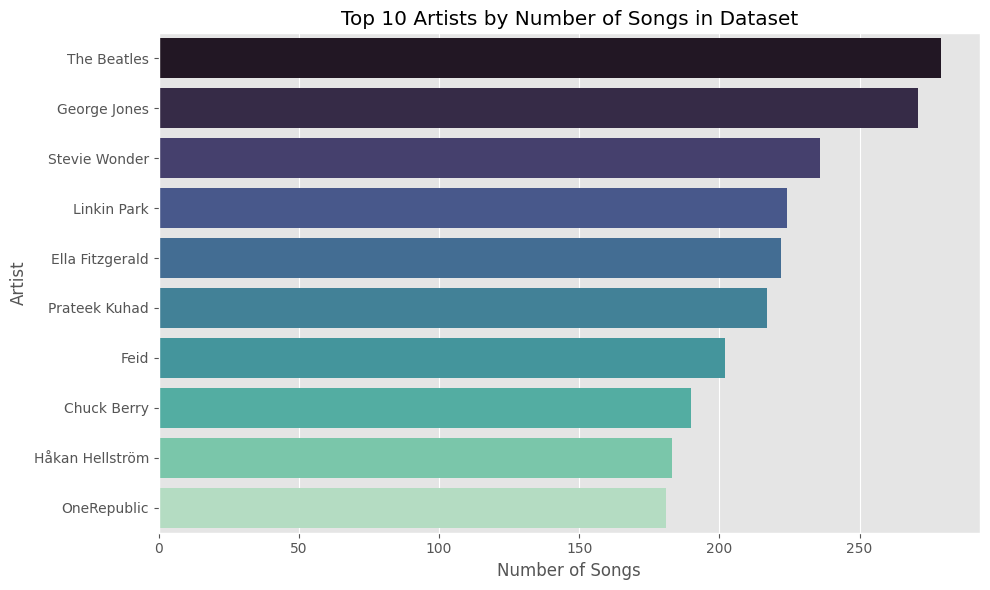

In [8]:
# Top Artists by Number of Songs
top_artists = df['artists'].value_counts().head(10).rename_axis('artist').reset_index(name='track_count')
plt.figure(figsize=(10,6))
sns.barplot(x='track_count', y='artist', data=top_artists,hue= 'artist',palette='mako',legend=False)
plt.title("Top 10 Artists by Number of Songs in Dataset")
plt.xlabel("Number of Songs")
plt.ylabel("Artist")
plt.tight_layout()
plt.show()

In [13]:
print(top_artists)
top_artists.to_csv(r'C:\Users\user\Downloads\top_artists.csv', index=True)

            artist  track_count
0      The Beatles          279
1     George Jones          271
2    Stevie Wonder          236
3      Linkin Park          224
4  Ella Fitzgerald          222
5    Prateek Kuhad          217
6             Feid          202
7      Chuck Berry          190
8  Håkan Hellström          183
9      OneRepublic          181


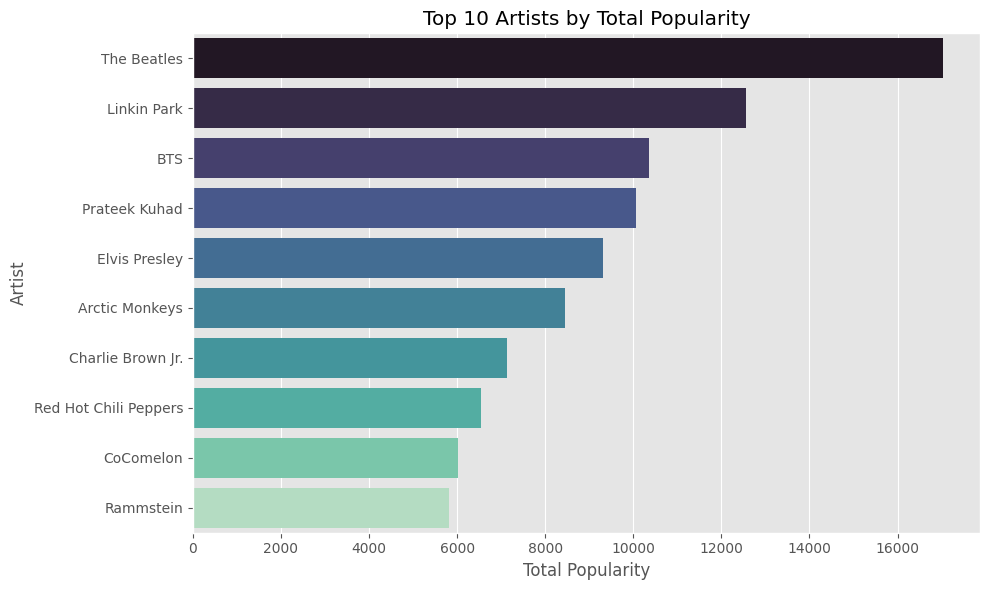

In [19]:
# Top Artists by Total Popularity
artist_popularity = (
    df.groupby('artists')['popularity']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)
plt.figure(figsize=(10,6))
sns.barplot(x='popularity', y='artists', data=artist_popularity,hue='artists',legend=False, palette='mako')
plt.title("Top 10 Artists by Total Popularity")
plt.xlabel("Total Popularity")
plt.ylabel("Artist")
plt.tight_layout()
plt.show()

In [ ]:

# Hypothesis Test: Songs where track_name == album_name are more popular


df['same_name'] = df['track_name'].str.lower() == df['album_name'].str.lower()
popularity_comparison = df.groupby('same_name')['popularity'].mean().reset_index()
print(popularity_comparison)


print("Average popularity (same track & album name):", same_name['popularity'].mean())
print("Average popularity (different names):", diff_name['popularity'].mean())


   same_name  popularity
0      False   30.382478
1       True   46.458553
Average popularity (same track & album name): 46.49798095617927
Average popularity (different names): 30.407600596125185


C:\Users\user\AppData\Local\Temp\ipykernel_33980\1511339378.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='same_name', y='popularity', data=df, palette='mako')


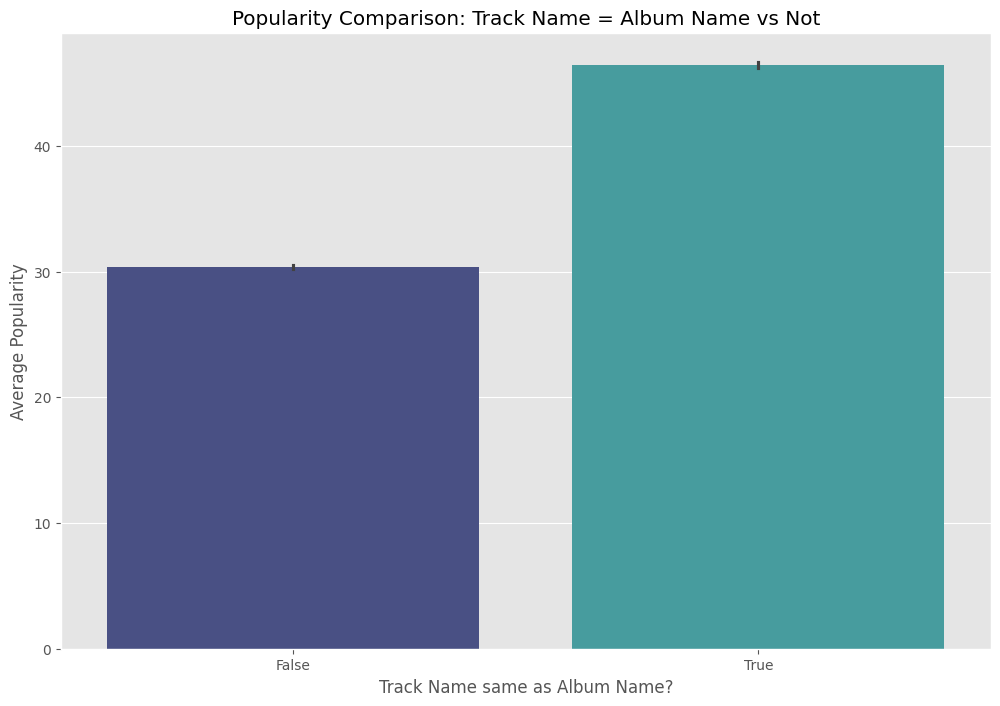

In [46]:
sns.barplot(x='same_name', y='popularity', data=df, palette='mako')
plt.title("Popularity Comparison: Track Name = Album Name vs Not")
plt.xlabel("Track Name same as Album Name?")
plt.ylabel("Average Popularity")
plt.show()

   track_genre  total_popularity  avg_popularity  song_count
81    pop-film             59283       59.283000        1000
65       k-pop             56896       56.952953         999
15       chill             53651       53.651000        1000
94         sad             52379       52.379000        1000
44      grunge             49594       49.594000        1000
55      indian             49539       49.539000        1000
5        anime             48772       48.772000        1000
33         emo             48128       48.128000        1000
97   sertanejo             47866       47.866000        1000
80         pop             47576       47.576000        1000


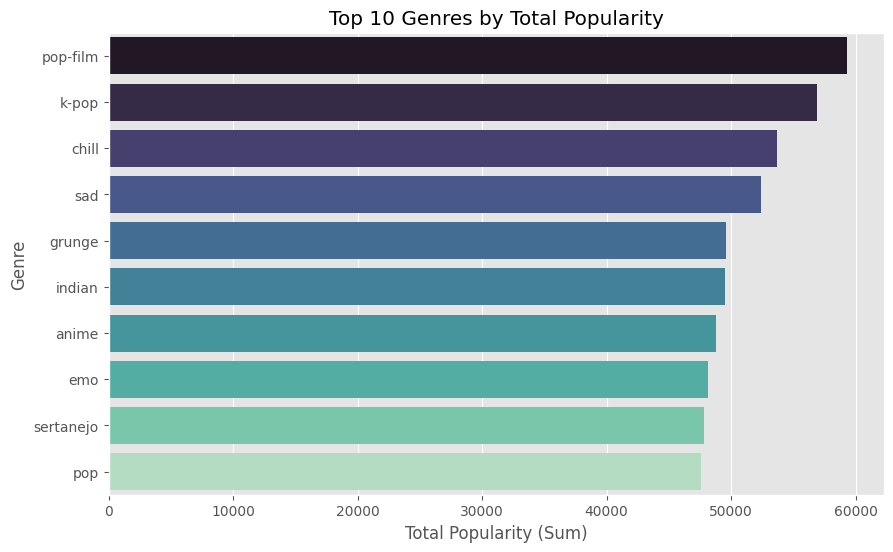

In [17]:
# Group by genre and calculate total and average popularity
genre_popularity = (
    df.groupby('track_genre')
    .agg(total_popularity=('popularity', 'sum'),
         avg_popularity=('popularity', 'mean'),
         song_count=('track_name', 'count'))
    .reset_index()
    .sort_values(by='total_popularity', ascending=False)
)

# Display top 10 genres by total popularity
print(genre_popularity.head(10))

# visualize
plt.figure(figsize=(10,6))
sns.barplot(x='total_popularity', y='track_genre', data=genre_popularity.head(10), hue='track_genre', legend=False,palette='mako')
plt.title("Top 10 Genres by Total Popularity")
plt.xlabel("Total Popularity (Sum)")
plt.ylabel("Genre")
plt.show()

genre_popularity.to_csv(r'C:\Users\user\Downloads\top_genre.csv', index=True)

# Insights and conclusions
---
1. Features like **danceability**, **loudness** and **explicit** show mild positive correlation with popularity.
2. **Valence**, **instrumentalism** and **acousticness** show negative correlation with popularity.
3. Songs with the **same** track and album name tend to have higher popularity as compared to those with different names.
4. The *most popular song* during the time period the data was collected was **unholy by Sam Smith ft Kim Petreas** with a popularity of 100.
5. The artists with the *most popular songs* is **The Beatles** with a total of 279 songs on the dateset and a total popularity of 17021.
- Most artists only have one song in the data set so mean popularity can be misleading therefore checked most popular artists using sum of the popularity.
6. The *most popular genre* is **pop-film** with an average popularity of *59.28* and a total song count of *1000 songs*.